# Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/student-habits-vs-academic-performance/student_habits_performance.csv")

df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [ ]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [ ]:
df[['internet_quality']].value_counts()

,count
internet_quality,
Good,447
Average,391
Poor,162


# Data Prerocessing

#### **Cek missing value**

In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


**"parental_education_level" memiliki 91 jumlah nilai yang hilang, mari lihat sebarannya.**

91


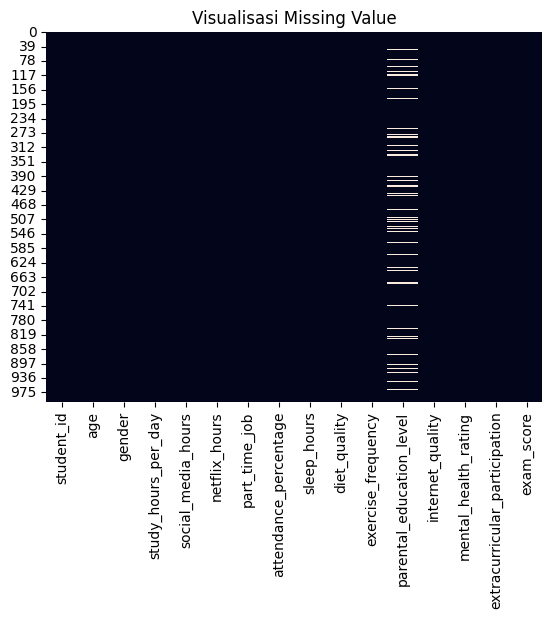

In [ ]:
# Cek missing value
print(df['parental_education_level'].isnull().sum())

# Visualisasi missing
sns.heatmap(df.isnull(), cbar=False)
plt.title("Visualisasi Missing Value")
plt.show()

***Hampir rata menyebar di sepanjang baris, tidak hanya terkonsentrasi di awal, tengah, atau akhir.***

In [ ]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167


**Untuk menangani masalah ini, dengan mengisi nilai yang hilang dengan kategori "Unknown".**

**Mungkin memang siswa tersebut tidak tahu latar belakang pendidikan orang tuanya. Jadi "Unknown" bisa mencerminkan realita.**

In [ ]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')


In [ ]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167
Unknown,91


In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


#### **Deskripsi data**

In [ ]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
df.describe(include=['object'])

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,4,3,2
top,S1999,Female,No,Fair,High School,Good,No
freq,1,481,785,437,392,447,682


#### **Check Outlier**

In [ ]:
import pandas as pd

# Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# Buat dictionary buat nyimpan info outlier
outlier_summary = {}

# Loop tiap kolom numerik
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cari outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Simpan jumlah dan persentase
    outlier_summary[col] = {
        'Jumlah Outlier': len(outliers),
        'Persentase Outlier (%)': round((len(outliers)/len(df))*100, 2)
    }

# Tampilkan hasilnya sebagai DataFrame
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


                       Jumlah Outlier  Persentase Outlier (%)
age                               0.0                     0.0
study_hours_per_day               7.0                     0.7
social_media_hours                5.0                     0.5
netflix_hours                     4.0                     0.4
attendance_percentage             3.0                     0.3
sleep_hours                       2.0                     0.2
exercise_frequency                0.0                     0.0
mental_health_rating              0.0                     0.0
exam_score                        2.0                     0.2


In [ ]:
df[df['study_hours_per_day'] == df['study_hours_per_day'].min()]


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
186,S1186,18,Female,0.0,1.9,1.5,No,82.4,5.6,Fair,3,Bachelor,Average,8,No,55.2
195,S1195,18,Female,0.0,2.8,1.6,No,93.4,5.8,Fair,0,Bachelor,Good,5,No,26.7
379,S1379,17,Male,0.0,2.6,1.6,No,82.4,7.4,Good,5,High School,Average,3,No,32.9
402,S1402,19,Male,0.0,1.4,0.0,No,81.5,6.7,Good,5,High School,Good,8,Yes,50.1
431,S1431,22,Female,0.0,2.0,2.5,No,82.0,3.7,Poor,4,Bachelor,Average,2,No,29.9
434,S1434,20,Male,0.0,3.5,3.2,No,72.6,6.2,Fair,3,High School,Good,2,No,26.2
590,S1590,17,Female,0.0,4.6,1.2,No,96.2,6.1,Poor,6,Bachelor,Average,7,No,42.0
766,S1766,21,Male,0.0,2.4,2.9,No,85.6,3.8,Poor,3,Unknown,Average,8,No,30.5
811,S1811,19,Female,0.0,2.4,0.6,Yes,87.0,7.1,Good,4,High School,Average,5,No,53.0


#### **Label Encoding**

In [ ]:
df['extracurricular_participation'].value_counts()

,count
extracurricular_participation,
No,682
Yes,318


In [ ]:
# tampilkan data object saja
df.select_dtypes(include=['object']).columns


Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [ ]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


In [ ]:
df['internet_quality'].value_counts()

,count
internet_quality,
Good,447
Average,391
Poor,162


**one hot encoding = gender,part_time_job,extracurricular_participation.**


**label encoding =  diet_quality,parental_education_level,internet_quality**

In [ ]:
df['diet_quality'].value_counts()

,count
diet_quality,
Fair,437
Good,378
Poor,185


**one hot encoding**

In [ ]:
df_new_encoded = pd.get_dummies(
    df,
    columns=['gender', 'part_time_job', 'extracurricular_participation'],
    dtype=int
)

In [ ]:
df_new_encoded.isnull().sum()

,0
student_id,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0
parental_education_level,0


In [ ]:
df_new_encoded['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167
Unknown,91


In [ ]:
df_new_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         1000 non-null   object 
 1   age                                1000 non-null   int64  
 2   study_hours_per_day                1000 non-null   float64
 3   social_media_hours                 1000 non-null   float64
 4   netflix_hours                      1000 non-null   float64
 5   attendance_percentage              1000 non-null   float64
 6   sleep_hours                        1000 non-null   float64
 7   diet_quality                       1000 non-null   object 
 8   exercise_frequency                 1000 non-null   int64  
 9   parental_education_level           1000 non-null   object 
 10  internet_quality                   1000 non-null   object 
 11  mental_health_rating               1000 non-null   int64 

**Label Encoding**

In [ ]:
diet_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_map = {'Unknown':-1,'High School': 0, 'Bachelor': 1, 'Master': 2}
internet_quality_map = {'Poor': 0, 'Average': 1, 'Good': 2}


In [ ]:
df_new_encodedd = df_new_encoded.copy()

In [ ]:
df_new_encodedd['diet_quality_encoded'] = df['diet_quality'].map(diet_quality_map)
df_new_encodedd['parental_education_encoded'] = df['parental_education_level'].map(parental_education_map)
df_new_encodedd['internet_quality_encoded'] = df['internet_quality'].map(internet_quality_map)


In [ ]:
df_new_encodedd[['diet_quality_encoded', 'parental_education_encoded', 'internet_quality_encoded']].head()


,diet_quality_encoded,parental_education_encoded,internet_quality_encoded
0,1,2,1
1,2,0,1
2,0,0,0
3,0,2,2
4,1,2,2


In [ ]:
df_new_encodedd.drop(['diet_quality', 'parental_education_level', 'internet_quality'], axis=1, inplace=True, errors='ignore')


In [ ]:
new_df = df_new_encodedd.drop('student_id', axis=1)
new_df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes,diet_quality_encoded,parental_education_encoded,internet_quality_encoded
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,0,0,1,0,0,1,1,2,1
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,1,0,0,1,0,1,0,2,0,1
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,1,0,1,0,1,0,0,0,0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,1,0,0,1,0,0,1,0,2,2
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,0,0,1,0,1,0,1,2,2


In [ ]:
new_df.isnull().sum()

,0
age,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0
exam_score,0
gender_Female,0


# EDA Lanjutan

##### Bagaimana hubungan antar semua variabel ?

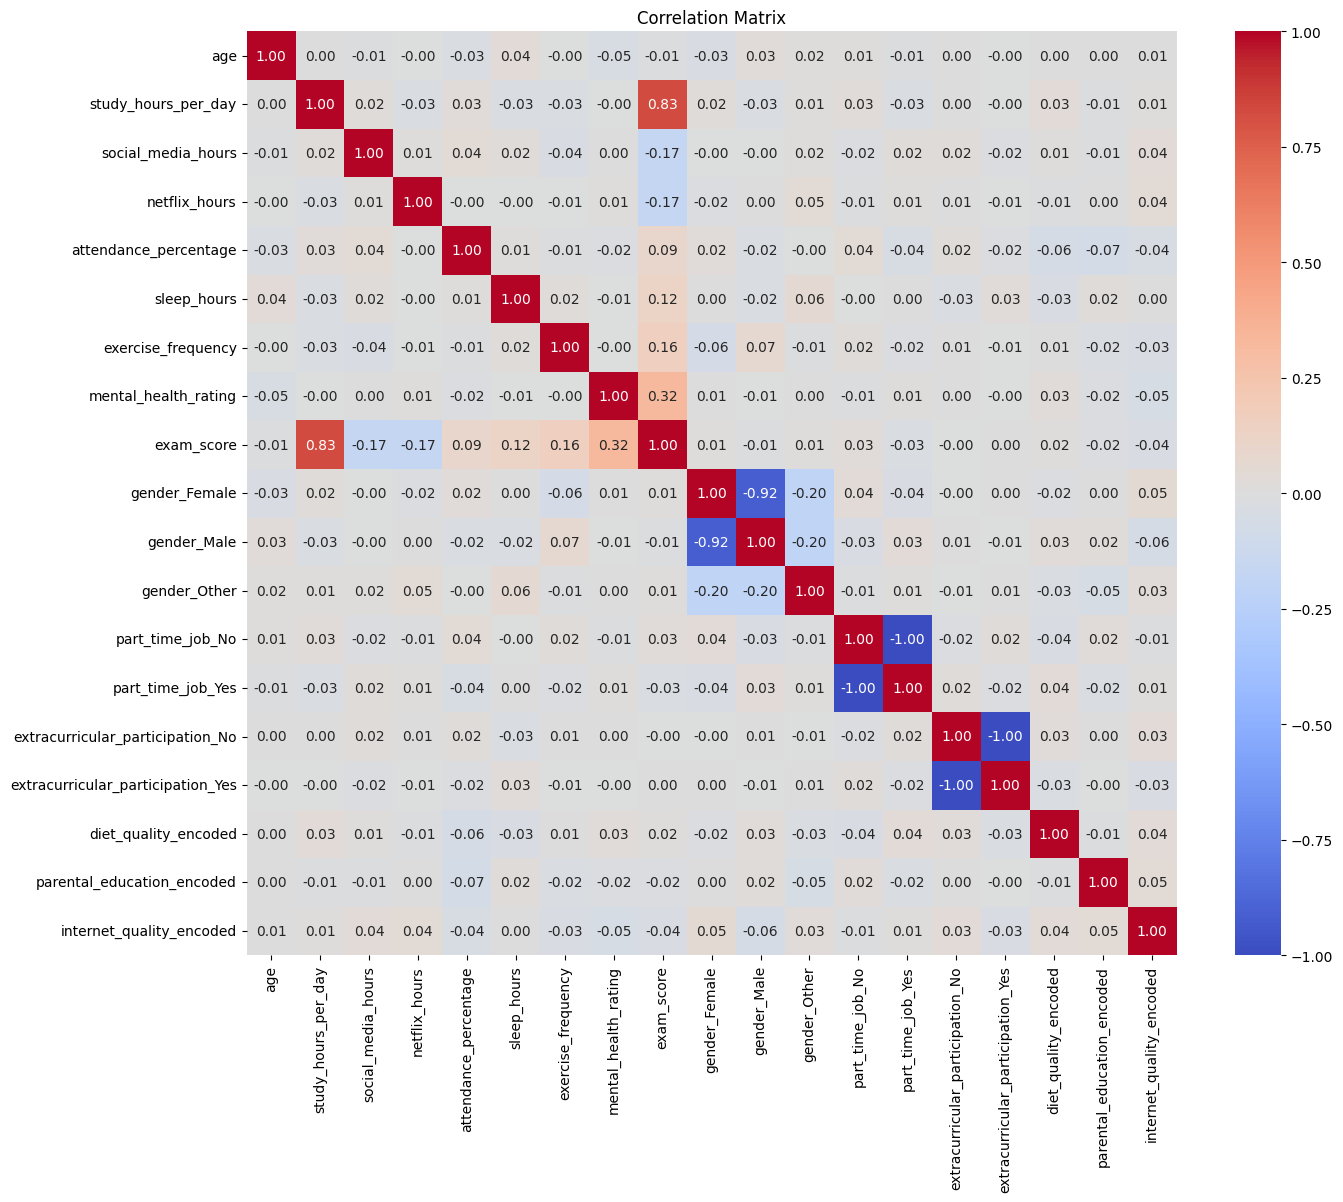

In [ ]:
plt.figure(figsize=(15,12))
correlation_matrix = new_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
new_df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)

,exam_score
exam_score,1.000000
study_hours_per_day,0.825419
mental_health_rating,0.321523
exercise_frequency,0.160107
sleep_hours,0.121683
attendance_percentage,0.089836
part_time_job_No,0.026608
diet_quality_encoded,0.015018
gender_Other,0.012976
gender_Female,0.007977


##### Apakah siswa yang belajarnya nya lama berpengaruh terhadap nilai ujian ?

<Figure size 1500x1500 with 0 Axes>

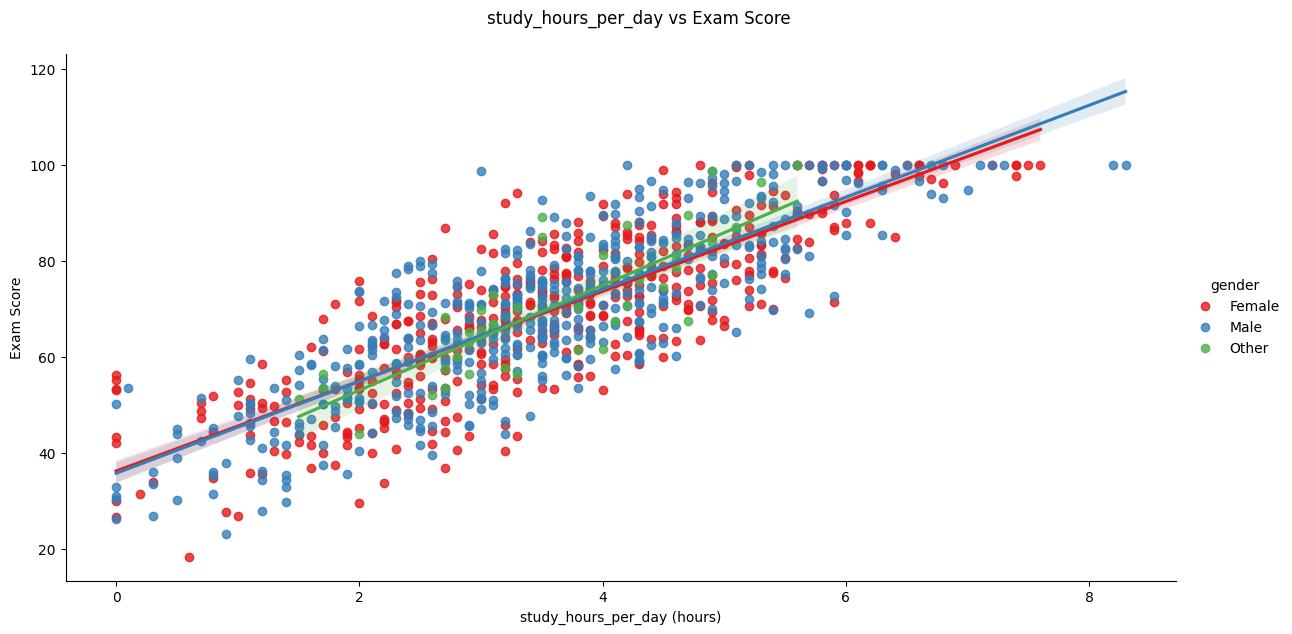

In [ ]:
plt.figure(figsize=(15,15))
g = sns.lmplot(x='study_hours_per_day', y='exam_score', data=df,
               hue='gender',
               height=6,
               aspect=2,
               palette='Set1')
g.set_axis_labels("study_hours_per_day (hours)", "Exam Score")
g.fig.suptitle("study_hours_per_day vs Exam Score", y=1.05)

plt.xlabel("study_hours_per_day (hours)")
plt.ylabel("Exam Score")
plt.show()

##### Apakah siswa yang tidur nya lama berpengaruh terhadap nilai ujian ?

<Figure size 1500x1500 with 0 Axes>

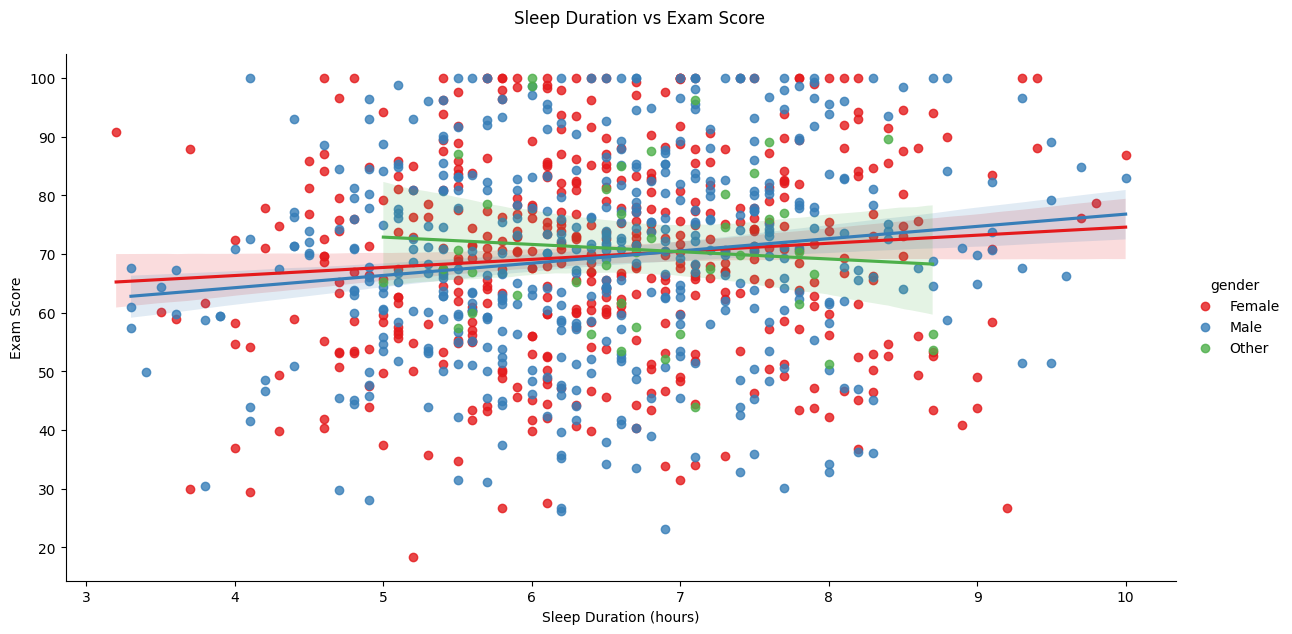

In [ ]:
plt.figure(figsize=(15,15))
g = sns.lmplot(x='sleep_hours', y='exam_score', data=df,
               hue='gender',
               height=6,
               aspect=2,
               palette='Set1')
g.set_axis_labels("Sleep Duration (hours)", "Exam Score")
g.fig.suptitle("Sleep Duration vs Exam Score", y=1.05)

plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Exam Score")
plt.show()

Hubungan durasi tidur dengan nilai ujian yang terbagi berdasarkan gender memang ada korelasi, namun sangat lemah. Baik siswa lk, pr maupun lainnya menunjukkan kecenderungan semakin lama tidur, sedikit lebih tinggi nilainya. Namun garis tren untuk masing-masing gender hampir datar, yang artinya tidur lama tidak selalu berbanding terbalik lurus dengan nilai yang baik.

Hal ini mengindikasikan bahwa tidur hanyalah salah satu dari banyak faktor yang memengaruhi performa akademik, dan mungkin bukan yang paling dominan.

In [ ]:
df[['sleep_hours', 'exam_score']].corr()


,sleep_hours,exam_score
sleep_hours,1.000000,0.121683
exam_score,0.121683,1.000000


##### Bagaimana pengaruh Siswa yang ikut ekstrakurikuler terhadap nilai ujian ?

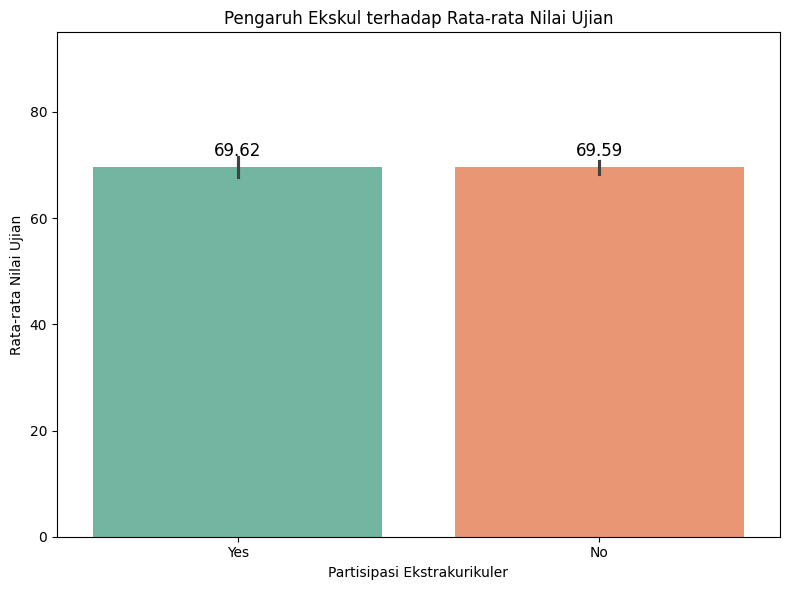

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='extracurricular_participation', y='exam_score', data=df,
               order=['Yes', 'No'], palette='Set2',
            hue='extracurricular_participation', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, fontsize=12)

plt.title("Pengaruh Ekskul terhadap Rata-rata Nilai Ujian")
plt.xlabel("Partisipasi Ekstrakurikuler")
plt.ylabel("Rata-rata Nilai Ujian")
plt.ylim(0, 95)  # beri ruang atas agar label tidak nabrak
plt.tight_layout()
plt.show()

**Rata-rata nilai ujian siswa berdasarkan partisipasi dalam kegiatan ekstrakurikuler, selisihnya sangat kecil, menunjukkan bahwa partisipasi dalam ekstrakurikuler tidak memberikan pengaruh signifikan terhadap rata-rata nilai ujian siswa dalam data ini.**

##### Apakah siswa dengan orang tua berpendidikan tinggi berpengaruh terhadap nilai ujian ?

In [ ]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167
Unknown,91


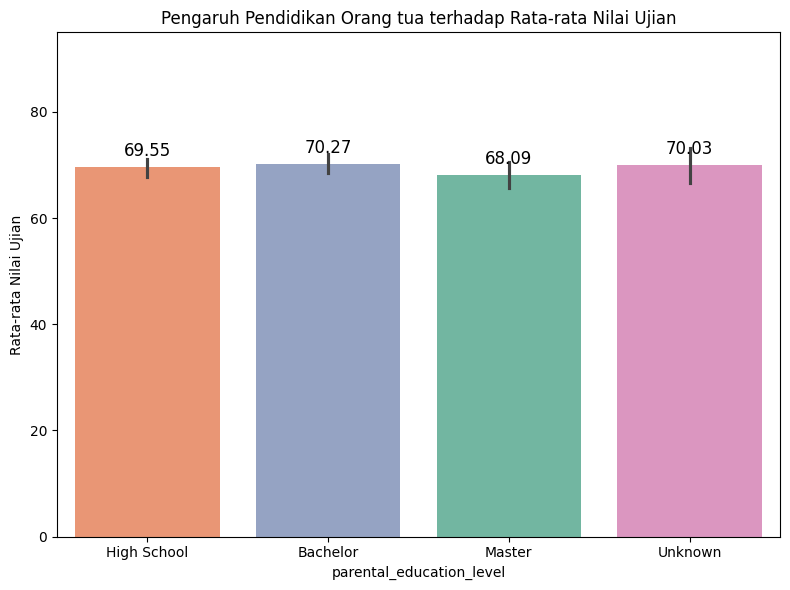

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='parental_education_level', y='exam_score', data=df,
               order=['High School', 'Bachelor','Master','Unknown'], palette='Set2',
            hue='parental_education_level', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5, fontsize=12)

plt.title("Pengaruh Pendidikan Orang tua terhadap Rata-rata Nilai Ujian")
plt.xlabel("parental_education_level")
plt.ylabel("Rata-rata Nilai Ujian")
plt.ylim(0, 95)  # beri ruang atas agar label tidak nabrak
plt.tight_layout()
plt.show()